In [10]:
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [11]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Data preprocessing

In [12]:
data = pd.DataFrame(pd.read_csv("Country-data.csv"))
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [14]:
sum(data.duplicated(subset='country')) == 0


True

In [15]:
data.shape

(167, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [17]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


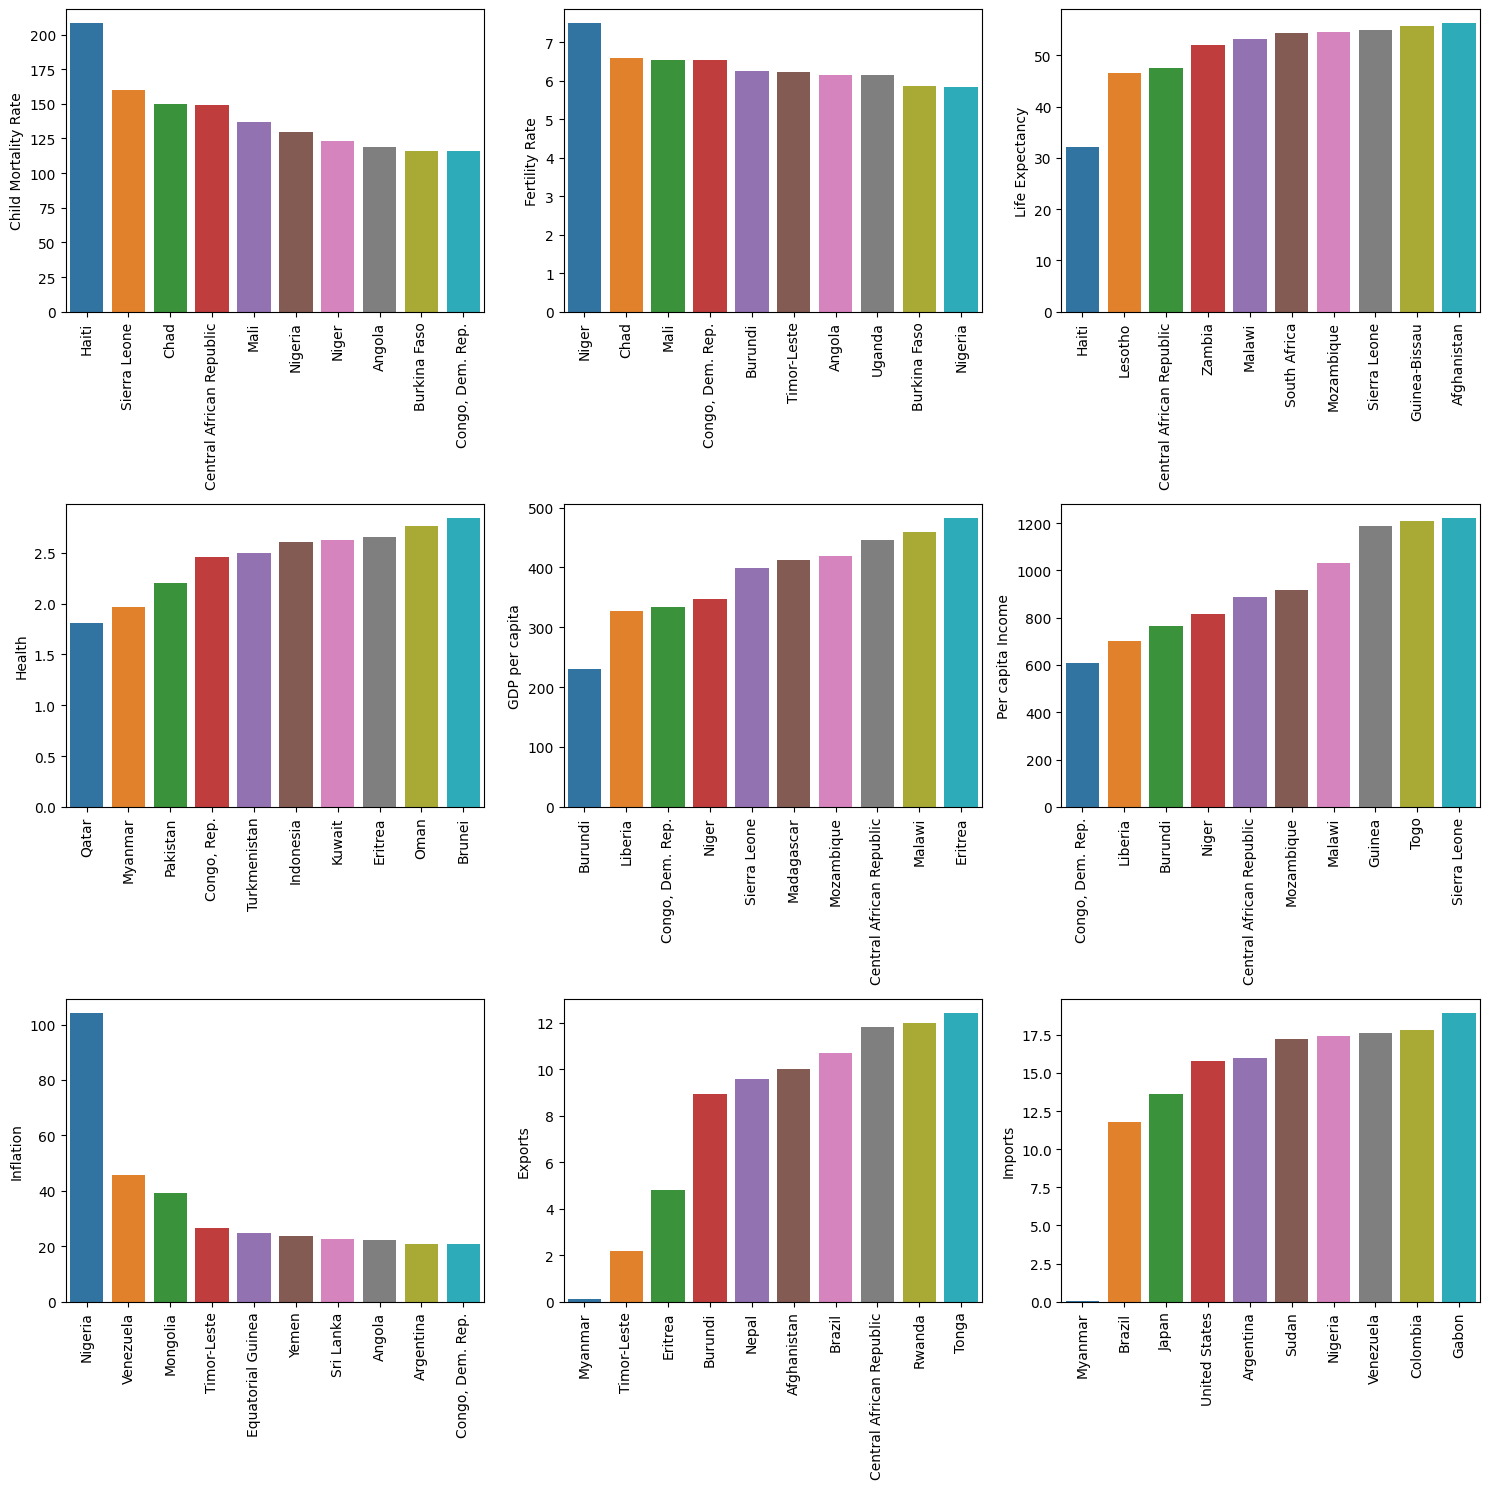

In [19]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()
    

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap="Y1GnBu")
plt.savefig('corrplot')
plt.show()


Outlier Analysis

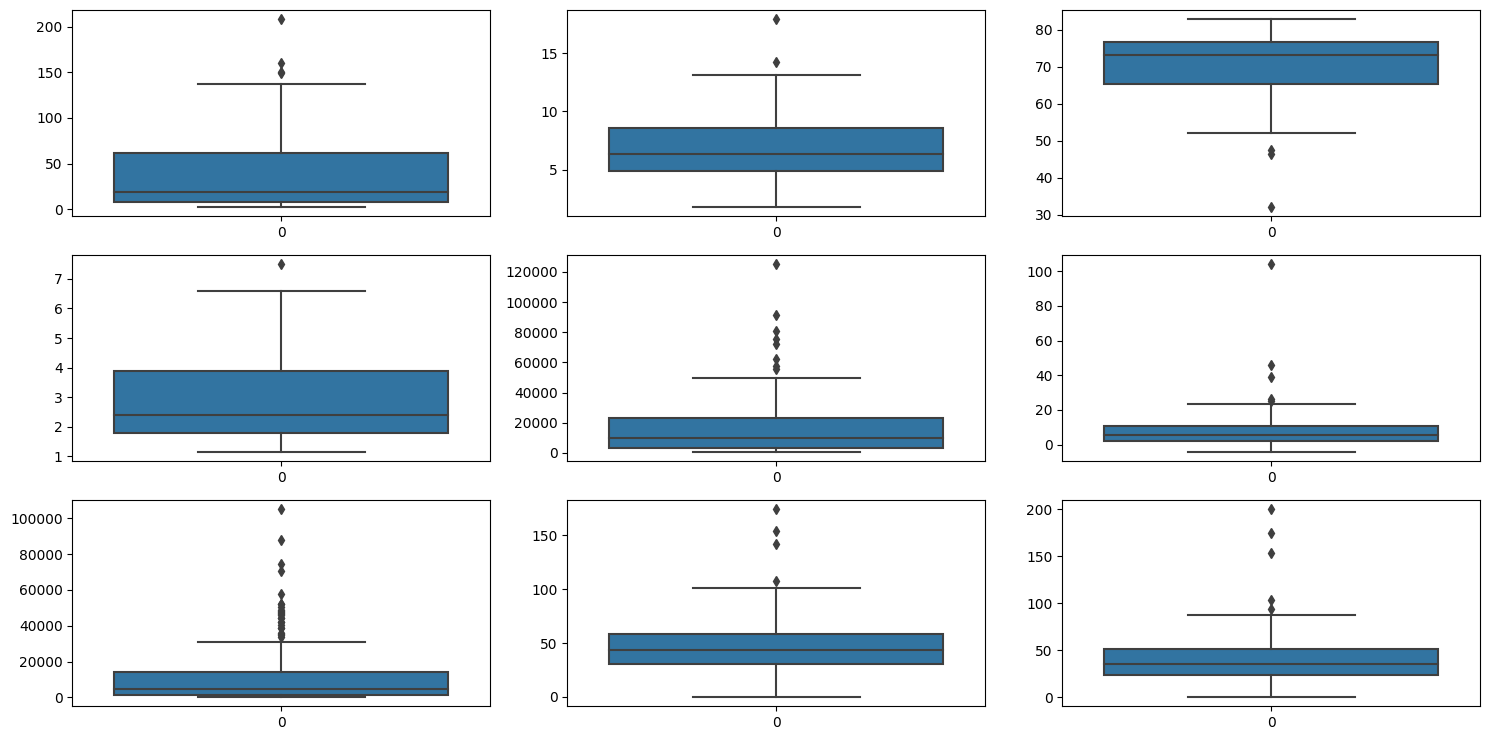

In [22]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'],ax=axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])

plt.tight_layout()

In [24]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [26]:
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [27]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = data_help['child_mort'].quantile([0.05,0.95]).values
data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_fer'].quantile([0.05,0.95]).values
data_help['total_fer'][data_help['total_fer'] <= percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['imports'].quantile([0.05,0.95]).values
data_help['imports'][data_help['imports'] <= percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['exports'].quantile([0.05,0.95]).values
data_help['exports'][data_help['exports'] <= percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports'] >= percentiles[1]] = percentiles[1]

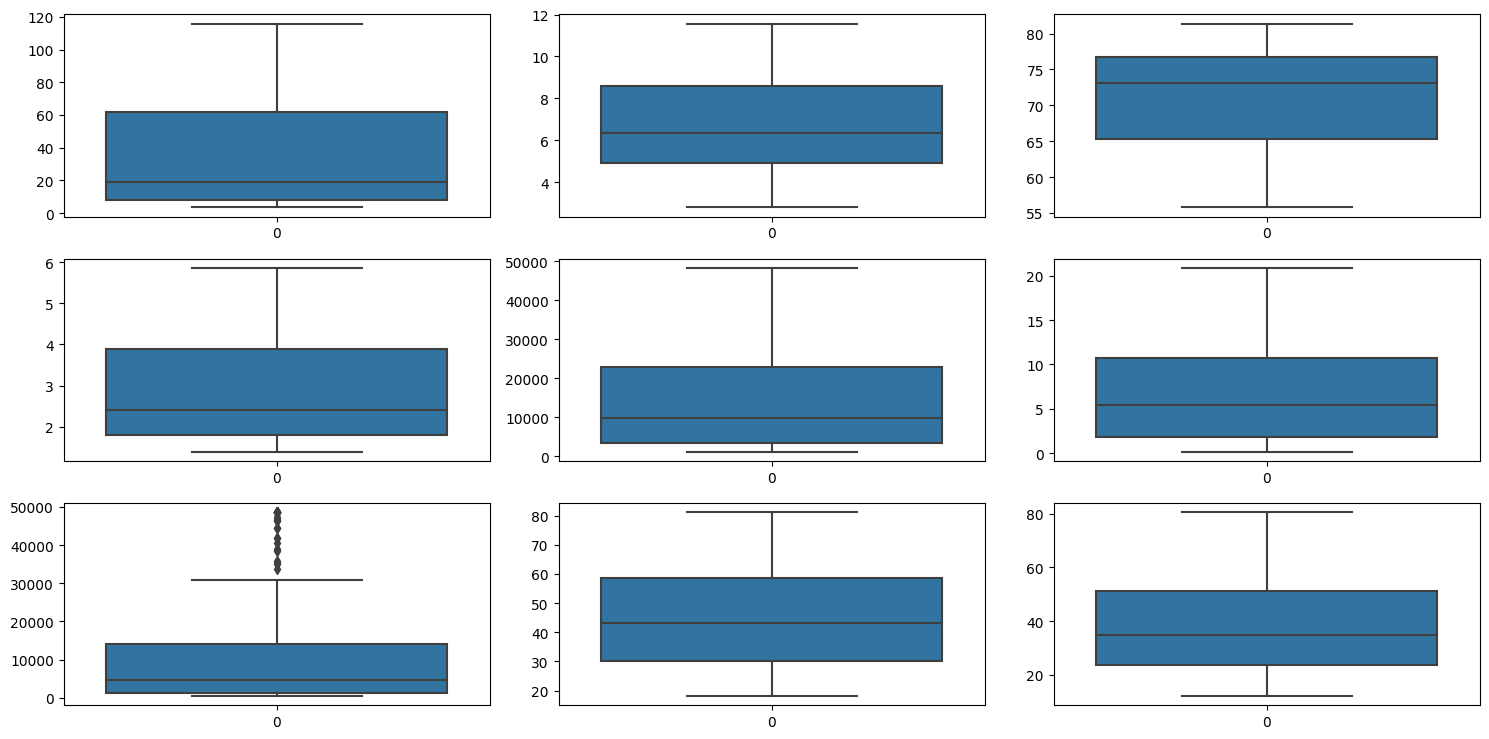

In [28]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])

plt.tight_layout()

Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

data_help[varlist] = scaler.fit_transform(data_help[varlist])

<h1>PCA on data</h1>

In [31]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(svd_solver='randomized',random_state=42)

#Singular Value Decomposition is a matrix factorization method utilized in many numerical applications of linear algebra such as PCA


In [34]:
X = data_help.drop(['country'],axis = 1)

y = data_help['country']

In [35]:
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [38]:
#let's plot principal components
pca.components_


array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [41]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1': pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income


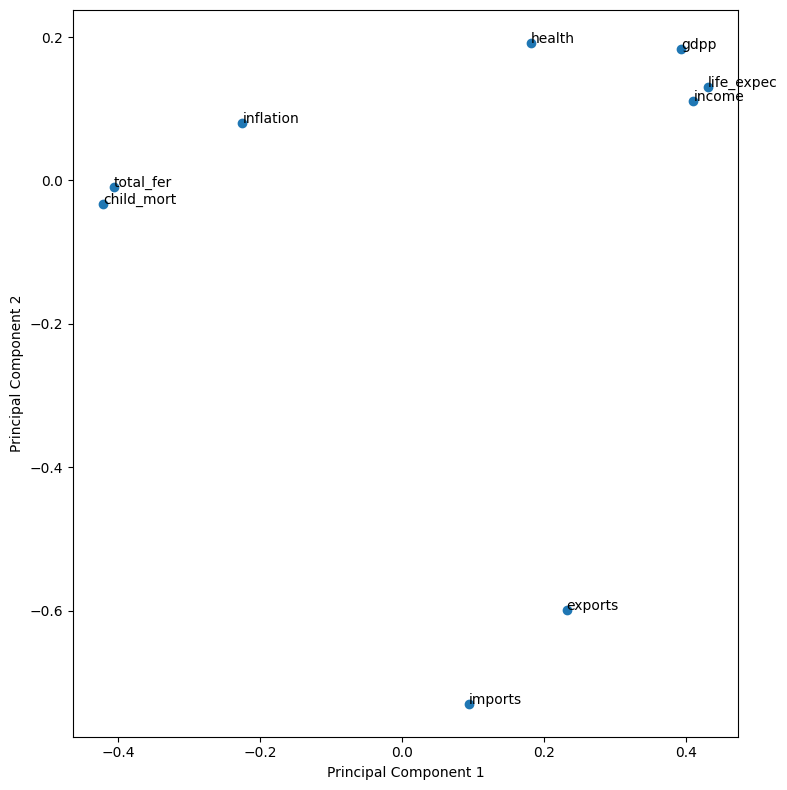

In [42]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [43]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

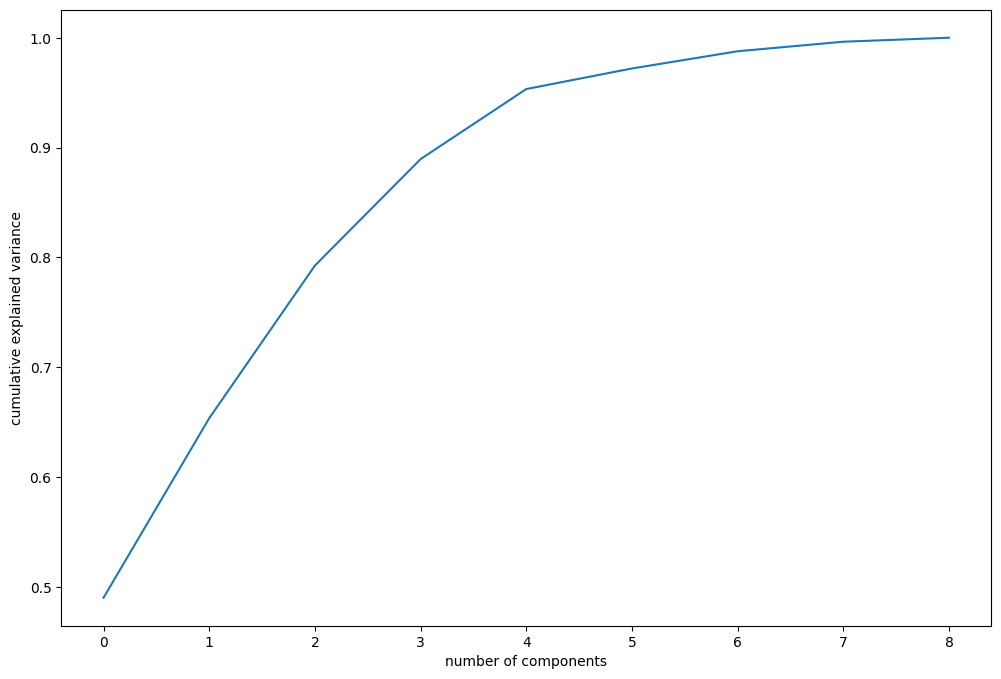

In [44]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

Looks like 4 components are enough to describe 95% of the variance in the dataset

Now we'll choose 4 components for our modeling


In [45]:
#using incremental PCA for efficiency saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA

In [46]:
pca_final = IncrementalPCA(n_components=4)


In [47]:
#getting the data onto our PCs
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [48]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


creating correlation matrix for principal components

In [49]:
corrmat = np.corrcoef(df_pca.transpose())

<Axes: >

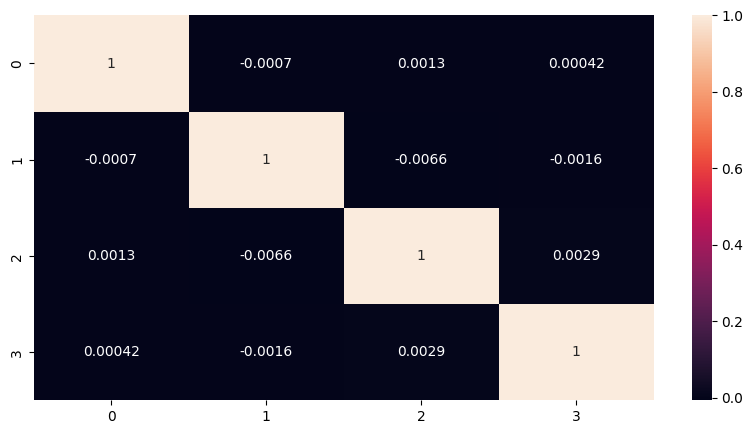

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(corrmat, annot = True)

<h1>Hierarchical clustering</h1>

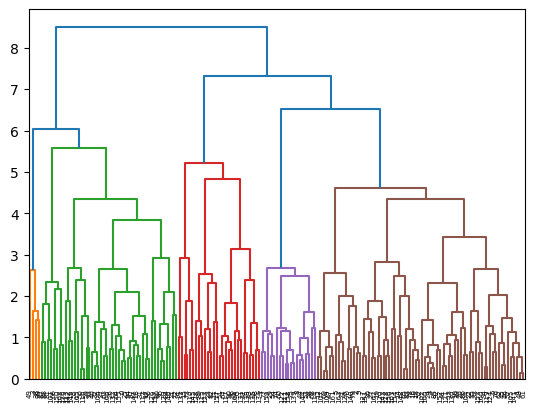

In [52]:
mergings = linkage(df_pca,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

Looking at the dedrogram it is observed that cutting it at n = 5 is most optimum.

In [53]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [59]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
pca_cluster_hc.head()


,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


In [60]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [62]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())


,gdpp
ClusterID,
0,1536.304348
1,5903.057143
2,6142.500000
3,43505.263158
4,29641.428571


In [63]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


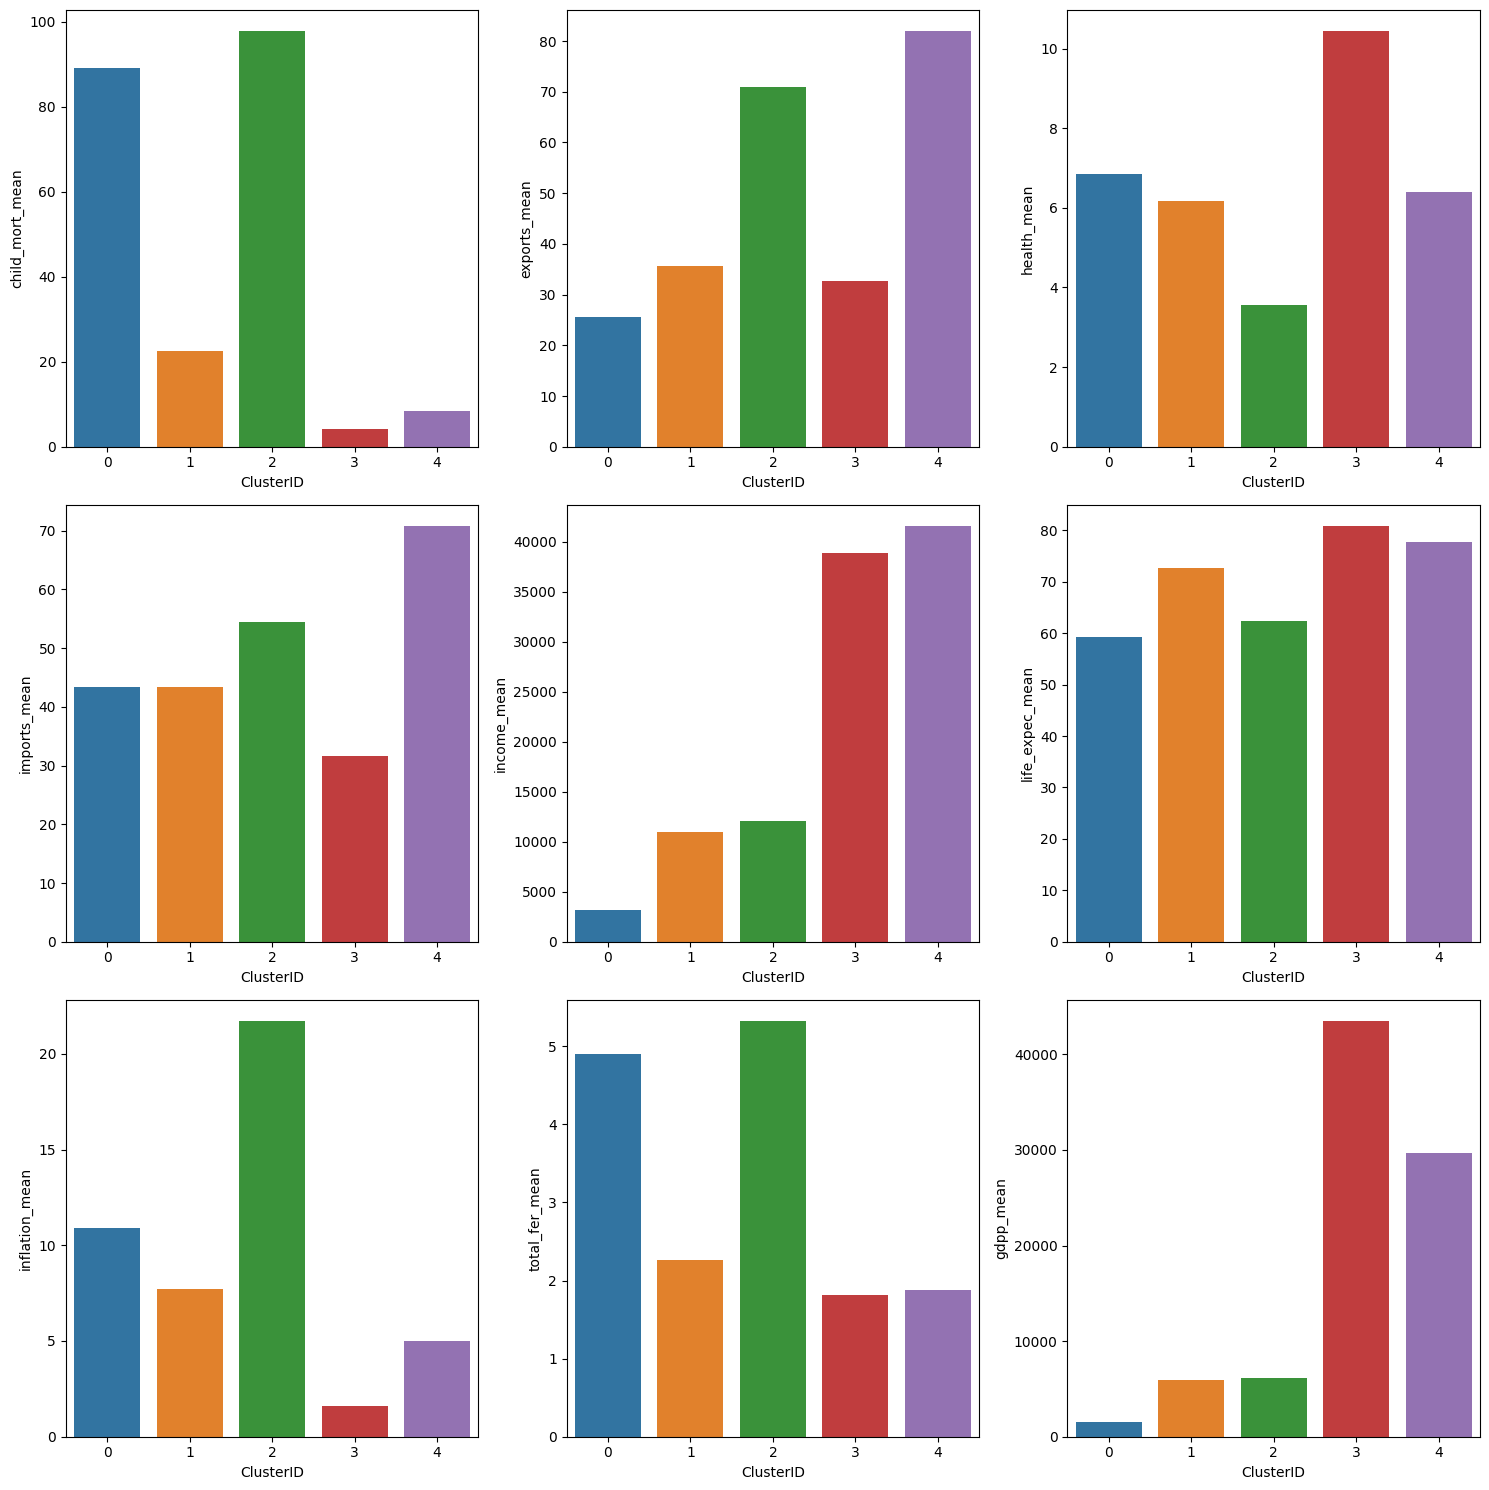

In [64]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [65]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values


array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

Cluster with ClusterID as 0, is the cluster of most backward country.